
# DSCI 100 Project Planning Report
---
Katherine Hsu // Mar. 15, 2025

## 1) Data Description

The data used in this project was taken from the "plaicraft.ai launch" project conducted by The Pacific Laboratory for Artificial Intelligence (PLAI) research group at UBC. Two datasets were obtained from participants who played on an online MineCraft server through which information about the participants and their play sessions were recorded.

### players.csv
This dataset contains a total of 196 observations (i.e. information about 196 unique players).

There are 7 variables which include:
- `experience` (character) - player's level of experience in the game (Veteran, Pro, Amateur, Regular, Beginner)
- `subscribe` (logical) - TRUE if player is subscribed to a game-related newsletter, FALSE if they are not subscribed
- `hashedEmail` (character) - player's email address scrambled into a unique code
- `played_hours` (double) - number of hours (to one decimal place) that the player has played the game
- `name` (character) - first name of the player
- `gender` (character) - player's gender (Male, Female, Non-binary, Prefer not to say, Agender, Two-spirited, Other)
- `Age` (double) - player's age as a number

Visible issues include:
- Some values in the `Age` column contain "NA" instead of a number which could be an issue for applying computations since not all values in the column are the same datatype.

Other potential issues:
- Values in the `hashedEmail` column differ in length and include both numbers and letters, which could present a challenge for functions requiring indexing.
- Each observation in `hashedEmail`is a unique code which could present challenges for filtering by this variable.

In [2]:
library(tidyverse)

In [3]:
# Load dataset

players_url <- "https://raw.githubusercontent.com/katherine-hsu/dsci-100-project/refs/heads/main/players%20(1).csv"
players <- read_csv(players_url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### sessions.csv
This dataset contains a total of 1535 observations (i.e. information about 1535 individual play sessions by unique players). 

There are 5 variables which include:
- `hashedEmail` (character) - player's email address scrambled into a unique code
- `start_time` (character) - date and time (24 hour clock) that play session started
- `end_time` (character) - date and time (24 hour clock) that play session ended
- `original_start_time` (double) - not sure how to interpret but values appear to be identical to `original_end_time`
- `original_end_time` (double) - see above

Visible issues include:
- `start_time` and `end_time` values are in the format dd/mm/yyyy 00:00, which makes the data untidy since there is more than a single value within each cell. Performing analysis on this column may require splitting date and time into separate variables.

Other potential issues:
- Same as in the `players.csv` dataset, values in the `hashedEmail` column differ in length and contain numbers as well as letters, which could present issues when applying functions that take specific data types as arguments.

In [4]:
# Load dataset

sessions_url <- "https://raw.githubusercontent.com/katherine-hsu/dsci-100-project/refs/heads/main/sessions.csv"
sessions <- read_csv(sessions_url)
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## 2) Questions

The broader question that I am interested in is knowing which "kinds" of players are most likely to contribute a large amount of data so that the researchers can target these players in their recruiting efforts. My specific question is:

Can `Age` and `gender` predict `played_hours` in `players.csv`?

I chose the number of hours played as an outcome variable because the more time someone spends playing on the Minecraft server, the more their engagement is going to contribute to the recorded data. Moreover, I chose to look at age and gender as predictor variables because the combination of these two participant factors could help the researchers
get a rough idea of the general audience to target in recruitment (e.g. teenage boys). 

Since this question only examines variables from `players.csv`, we won't need to extract data from `sessions.csv`. Additionally, the dataset requires some tidying as `Age` contains NA values.

## 3) Exploratory Data Analysis and Visualization

### Data tidying + wrangling

In [5]:
# Remove rows with NA values
players_tidy <- players |>
    na.omit()
    nrow(players_tidy)

[1] 194

In [6]:
# Create new dataframe with variables of interest
players_selected <- players_tidy |>
    select(played_hours, gender, Age) |>
    rename(age = Age)
head(players_selected)

played_hours,gender,age
<dbl>,<chr>,<dbl>
30.3,Male,9
3.8,Male,17
0.0,Male,17
0.7,Female,21
0.1,Male,21
0.0,Female,17


### Computing + reporting means

In [7]:
# Compute means
mean_played_hours <- players_selected |>
    select(played_hours) |>
    unlist() |>
    as.numeric() |>
    mean()

mean_age <- players_selected |>
    select(age) |>
    unlist() |>
    as.numeric() |>
    mean()

In [8]:
# Report mean values in table format
mean_table <- tibble(mean_played_hours,mean_age)
mean_table

mean_played_hours,mean_age
<dbl>,<dbl>
5.904639,20.52062


### Summary Statistics

In [9]:
# Summary stats for quantitative variables
summary_stats <- players_selected |>
    select(played_hours, age) |>
    summary()
summary_stats

  played_hours          age       
 Min.   :  0.000   Min.   : 8.00  
 1st Qu.:  0.000   1st Qu.:17.00  
 Median :  0.100   Median :19.00  
 Mean   :  5.905   Mean   :20.52  
 3rd Qu.:  0.600   3rd Qu.:22.00  
 Max.   :223.100   Max.   :50.00  

### Exploratory visualizations

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


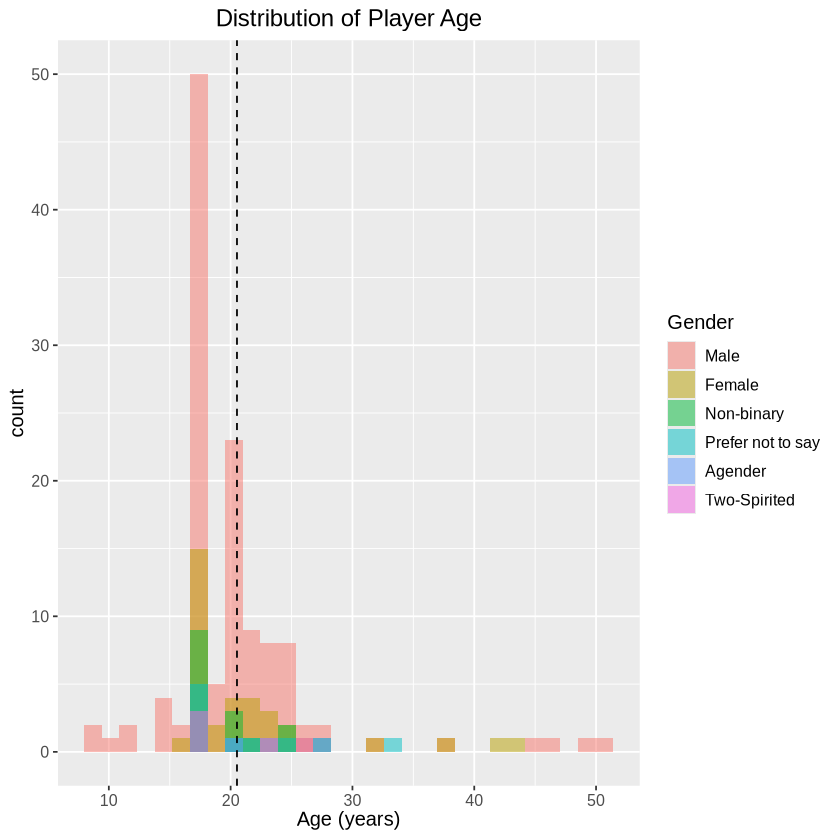

In [10]:
# Histogram for age
age_hist <- players_selected |>
    ggplot(aes(x = age, fill = as_factor(gender))) +
    geom_histogram(alpha = 0.5, position = "identity") +
    geom_vline(xintercept = mean_age, linetype = "dashed") +
    labs(x = "Age (years)", fill = "Gender",
         title = "Distribution of Player Age") +
    theme(text = element_text(size = 12),plot.title = element_text(hjust = 0.5))
age_hist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


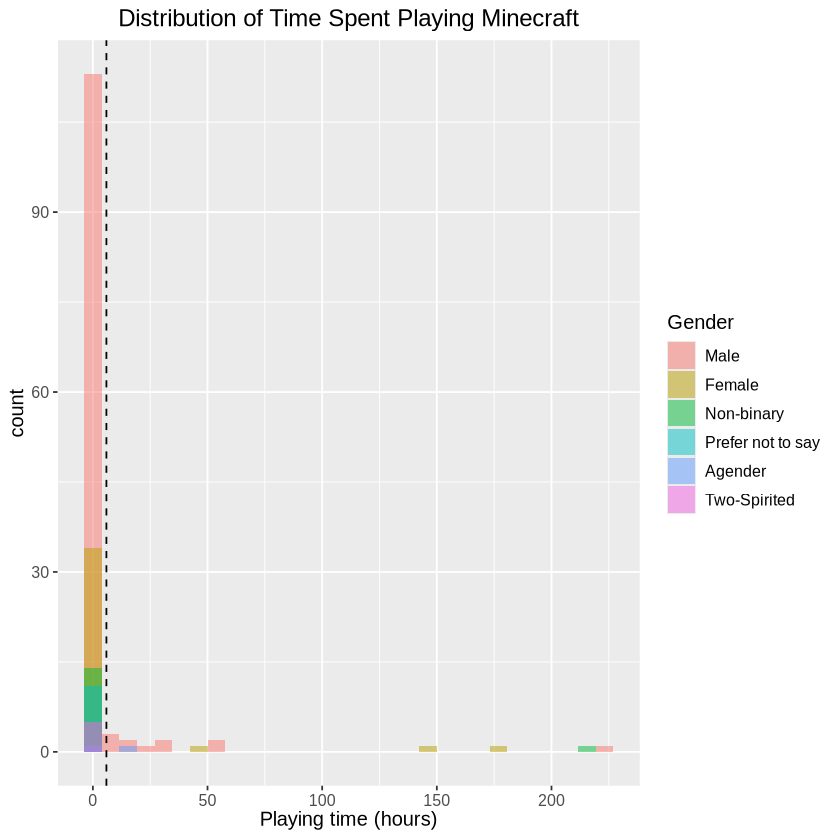

In [11]:
# Histogram for played_hours
played_hours_hist <- players_selected |>
    ggplot(aes(x = played_hours, fill = as_factor(gender))) +
    geom_histogram(alpha = 0.5, position = "identity") +
    geom_vline(xintercept = mean_played_hours, linetype = "dashed") +
    labs(x = "Playing time (hours)", fill = "Gender",
         title = "Distribution of Time Spent Playing Minecraft") +
    theme(text = element_text(size = 12),plot.title = element_text(hjust = 0.5))
played_hours_hist

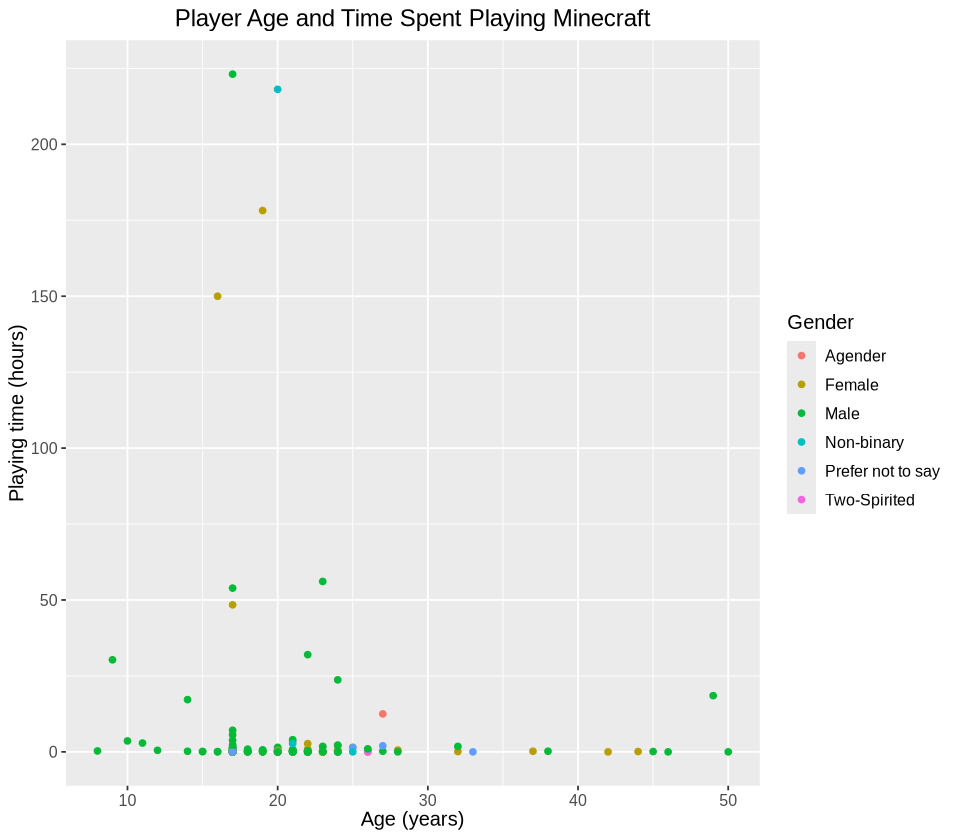

In [12]:
# Scatter plot for played_hours vs age
options(repr.plot.width = 8, repr.plot.height = 7)

players_plot <- players_selected |>
    ggplot(aes(x = age, y = played_hours, color = factor(gender))) +
    geom_point() +
    labs(x = "Age (years)", y = "Playing time (hours)", color = "Gender",
         title = "Player Age and Time Spent Playing Minecraft") +
    theme(text = element_text(size = 12),plot.title = element_text(hjust = 0.5))
players_plot

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_point()`).”


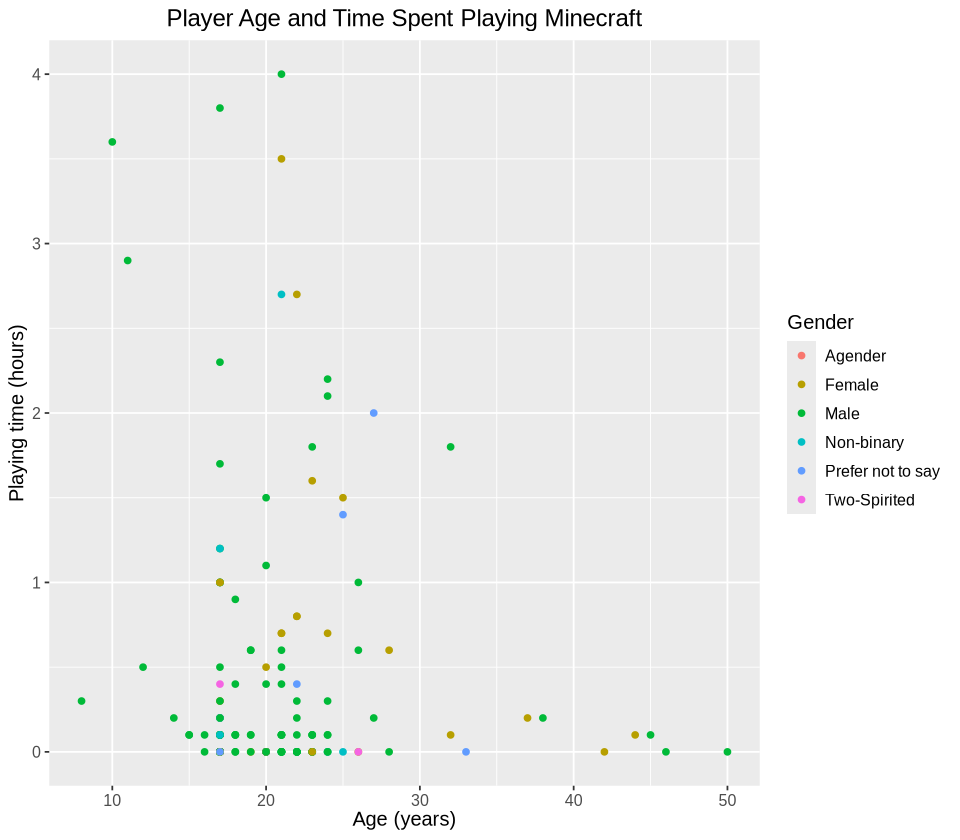

In [13]:
# ADJUSTED scatter plot for played_hours vs age
options(repr.plot.width = 8, repr.plot.height = 7)

players_plot <- players_selected |>
    ggplot(aes(x = age, y = played_hours, color = factor(gender))) +
    geom_point() +
    ylim(0,4) +
    labs(x = "Age (years)", y = "Playing time (hours)", color = "Gender",
         title = "Player Age and Time Spent Playing Minecraft") +
    theme(text = element_text(size = 12),plot.title = element_text(hjust = 0.5))
players_plot

### Preliminary insights

- From the first histogram, the distribution of `Age` appears to be positively skewed with an overwhelming majority of participants identifying as male. Considering the base rate for male players seems to be quite high, gender may not be the best predictor for playing time. 

- From the second histogram, we can see that `played_hours`is strongly skewed with some very extreme outliers. If we exclude these points and look at the distribution of points under the mean, there seems to be a slight curvilinear relationship between `played_hours` and `Age` as shown in the second scatterplot (i.e. playing time increases with age until approximately 20 years old then starts decreasing).

##  4) Methods and Plan
- Assuming the trend observed in the second scatterplot is curvilinear, I plan on using a k-nearest neighbour regression to predict `played_hours` based on `Age` and `gender` since knn is not limited by non-linear data.
- Some potential limitations of using knn regression is that the model is not as computationally efficient compared to a linear regression as the accuracy of predictions can vary with k which takes time to choose. Additionally, excluding outliers will decrease the number of observations that we can use to train and test our model.
- For our 194 observations, a typical 75-25 split would give us 145 datapoints to use for training and 49 points to test which seems quite small, so I might consider a 70-30 or even 65-35 split.
- I would then further divide the training set into a validation set and use cross validation to compare a set of k and choose the best one to retrain the model.